In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#Importing 2 DF's, 2000-2009 & 2010-2019
df1=pd.read_csv('../Desktop/Spotify_Hit_Predictor_Set_2000-2009.csv')
df2=pd.read_csv('../Desktop/Spotify_Hit_Predictor_Set_2010-2019.csv')

In [3]:
#Concatenating
df_fin=pd.concat([df1,df2], ignore_index=True)

In [4]:
df_fin

track             artist  \
0                     Lucky Man  Montgomery Gentry   
1                On The Hotline       Pretty Ricky   
2            Clouds Of Dementia         Candlemass   
3      Heavy Metal, Raise Hell!      Zwartketterij   
4               I Got A Feelin'   Billy Currington   
...                         ...                ...   
12265             Lotus Flowers              Yolta   
12266         Calling My Spirit        Kodak Black   
12267             Teenage Dream         Katy Perry   
12268            Stormy Weather     Oscar Peterson   
12269                      Dust        Hans Zimmer   

                                        uri  danceability  energy  key  \
0      spotify:track:4GiXBCUF7H6YfNQsnBRIzl         0.578   0.471    4   
1      spotify:track:1zyqZONW985Cs4osz9wlsu         0.704   0.854   10   
2      spotify:track:6cHZf7RbxXCKwEkgAZT4mY         0.162   0.836    9   
3      spotify:track:2IjBPp2vMeX7LggzRN3iSX         0.188   0.994    4   
4      spotify:track:1tF370eYXUcWwkIvaq3IGz         0.630   0.764    2   
...                                     ...           ...     ...  ...   
12265  spotify:track:4t1TljQWJ6ZuoSY67zVvBI         0.172   0.358    9   
12266  spotify:track:2MShy1GSSgbmGUxADNIao5         0.910   0.366    1   
12267  spotify:track:55qBw1900pZKfXJ6Q9A2Lc         0.719   0.804   10   
12268  spotify:track:4o9npmYHrOF1rUxxTVH8h4         0.600   0.177    7   
12269  spotify:track:2khIaVUkbMmDHB596lyMG3         0.121   0.123    4   

       loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0        -7.270     1       0.0289      0.368000          0.000000     0.159   
1        -5.477     0       0.1830      0.018500          0.000000     0.148   
2        -3.009     1       0.0473      0.000111          0.004570     0.174   
3        -3.745     1       0.1660      0.000007          0.078400     0.192   
4        -4.353     1       0.0275      0.363000          0.000000     0.125   
...         ...   ...          ...           ...               ...       ...   
12265   -14.430     1       0.0342      0.886000          0.966000     0.314   
12266    -9.954     1       0.0941      0.099600          0.000000     0.261   
12267    -4.581     1       0.0355      0.013200          0.000003     0.139   
12268   -16.070     1       0.0561      0.989000          0.868000     0.149   
12269   -23.025     0       0.0443      0.964000          0.696000     0.103   

       valence    tempo  duration_ms  time_signature  chorus_hit  sections  \
0       0.5320  133.061       196707               4    30.88059        13   
1       0.6880   92.988       242587               4    41.51106        10   
2       0.3000   86.964       338893               4    65.32887        13   
3       0.3330  148.440       255667               4    58.59528         9   
4       0.6310  112.098       193760               4    22.62384        10   
...        ...      ...          ...             ...         ...       ...   
12265   0.0361   72.272       150857               4    24.30824         7   
12266   0.7400  119.985       152000               4    32.53856         8   
12267   0.6050  119.999       227760               4    20.73371         7   
12268   0.5600  120.030       213387               4    21.65301        14   
12269   0.0297   95.182       341396               4    71.05343        15   

       target  
0           1  
1           1  
2           0  
3           0  
4           1  
...       ...  
12265       0  
12266       1  
12267       1  
12268       0  
12269       0  

[12270 rows x 19 columns]

In [5]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12270 entries, 0 to 12269
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             12270 non-null  object 
 1   artist            12270 non-null  object 
 2   uri               12270 non-null  object 
 3   danceability      12270 non-null  float64
 4   energy            12270 non-null  float64
 5   key               12270 non-null  int64  
 6   loudness          12270 non-null  float64
 7   mode              12270 non-null  int64  
 8   speechiness       12270 non-null  float64
 9   acousticness      12270 non-null  float64
 10  instrumentalness  12270 non-null  float64
 11  liveness          12270 non-null  float64
 12  valence           12270 non-null  float64
 13  tempo             12270 non-null  float64
 14  duration_ms       12270 non-null  int64  
 15  time_signature    12270 non-null  int64  
 16  chorus_hit        12270 non-null  float6

In [6]:
df_fin.describe().round(3)

danceability     energy        key   loudness       mode  speechiness  \
count     12270.000  12270.000  12270.000  12270.000  12270.000    12270.000   
mean          0.556      0.681      5.280     -7.523      0.645        0.095   
std           0.191      0.240      3.586      5.172      0.478        0.096   
min           0.059      0.000      0.000    -47.327      0.000        0.022   
25%           0.432      0.548      2.000     -8.375      0.000        0.037   
50%           0.573      0.727      5.000     -6.070      1.000        0.055   
75%           0.697      0.871      8.000     -4.585      1.000        0.109   
max           0.986      0.999     11.000      1.137      1.000        0.956   

       acousticness  instrumentalness   liveness    valence      tempo  \
count     12270.000         12270.000  12270.000  12270.000  12270.000   
mean          0.216             0.158      0.196      0.462    121.999   
std           0.297             0.311      0.164      0.251     30.008   
min           0.000             0.000      0.017      0.000     39.369   
25%           0.006             0.000      0.095      0.258     97.699   
50%           0.063             0.000      0.128      0.455    120.083   
75%           0.312             0.051      0.257      0.659    141.316   
max           0.996             0.998      0.987      0.982    213.233   

       duration_ms  time_signature  chorus_hit   sections   target  
count    12270.000       12270.000   12270.000  12270.000  12270.0  
mean    246977.300           3.923      40.888     10.671      0.5  
std     115132.482           0.391      19.895      4.841      0.5  
min      15920.000           0.000       0.000      1.000      0.0  
25%     199387.000           4.000      27.825      8.000      0.0  
50%     228846.500           4.000      36.175     10.000      0.5  
75%     269217.000           4.000      48.158     12.000      1.0  
max    4170227.000           5.000     262.615    169.000      1.0

In [7]:
df_fin.target.value_counts(normalize=True)

1    0.5
0    0.5
Name: target, dtype: float64

#### Checking Correlations

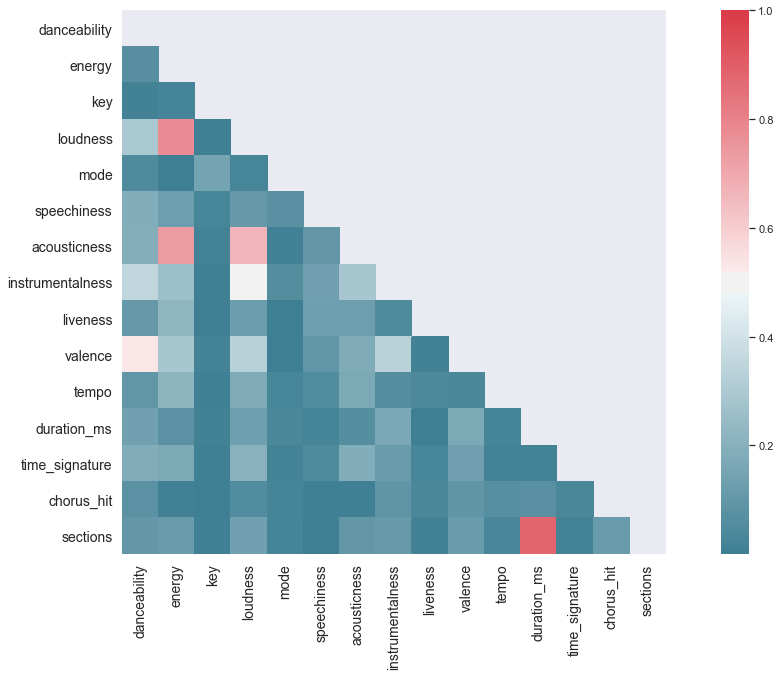

In [5]:
plt.figure(figsize=(20,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

mask = np.zeros_like(abs(df_fin.drop('target',axis=1).corr()))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(abs(df_fin.drop('target',axis=1).corr()), mask=mask, cmap=cmap, square=True)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14);

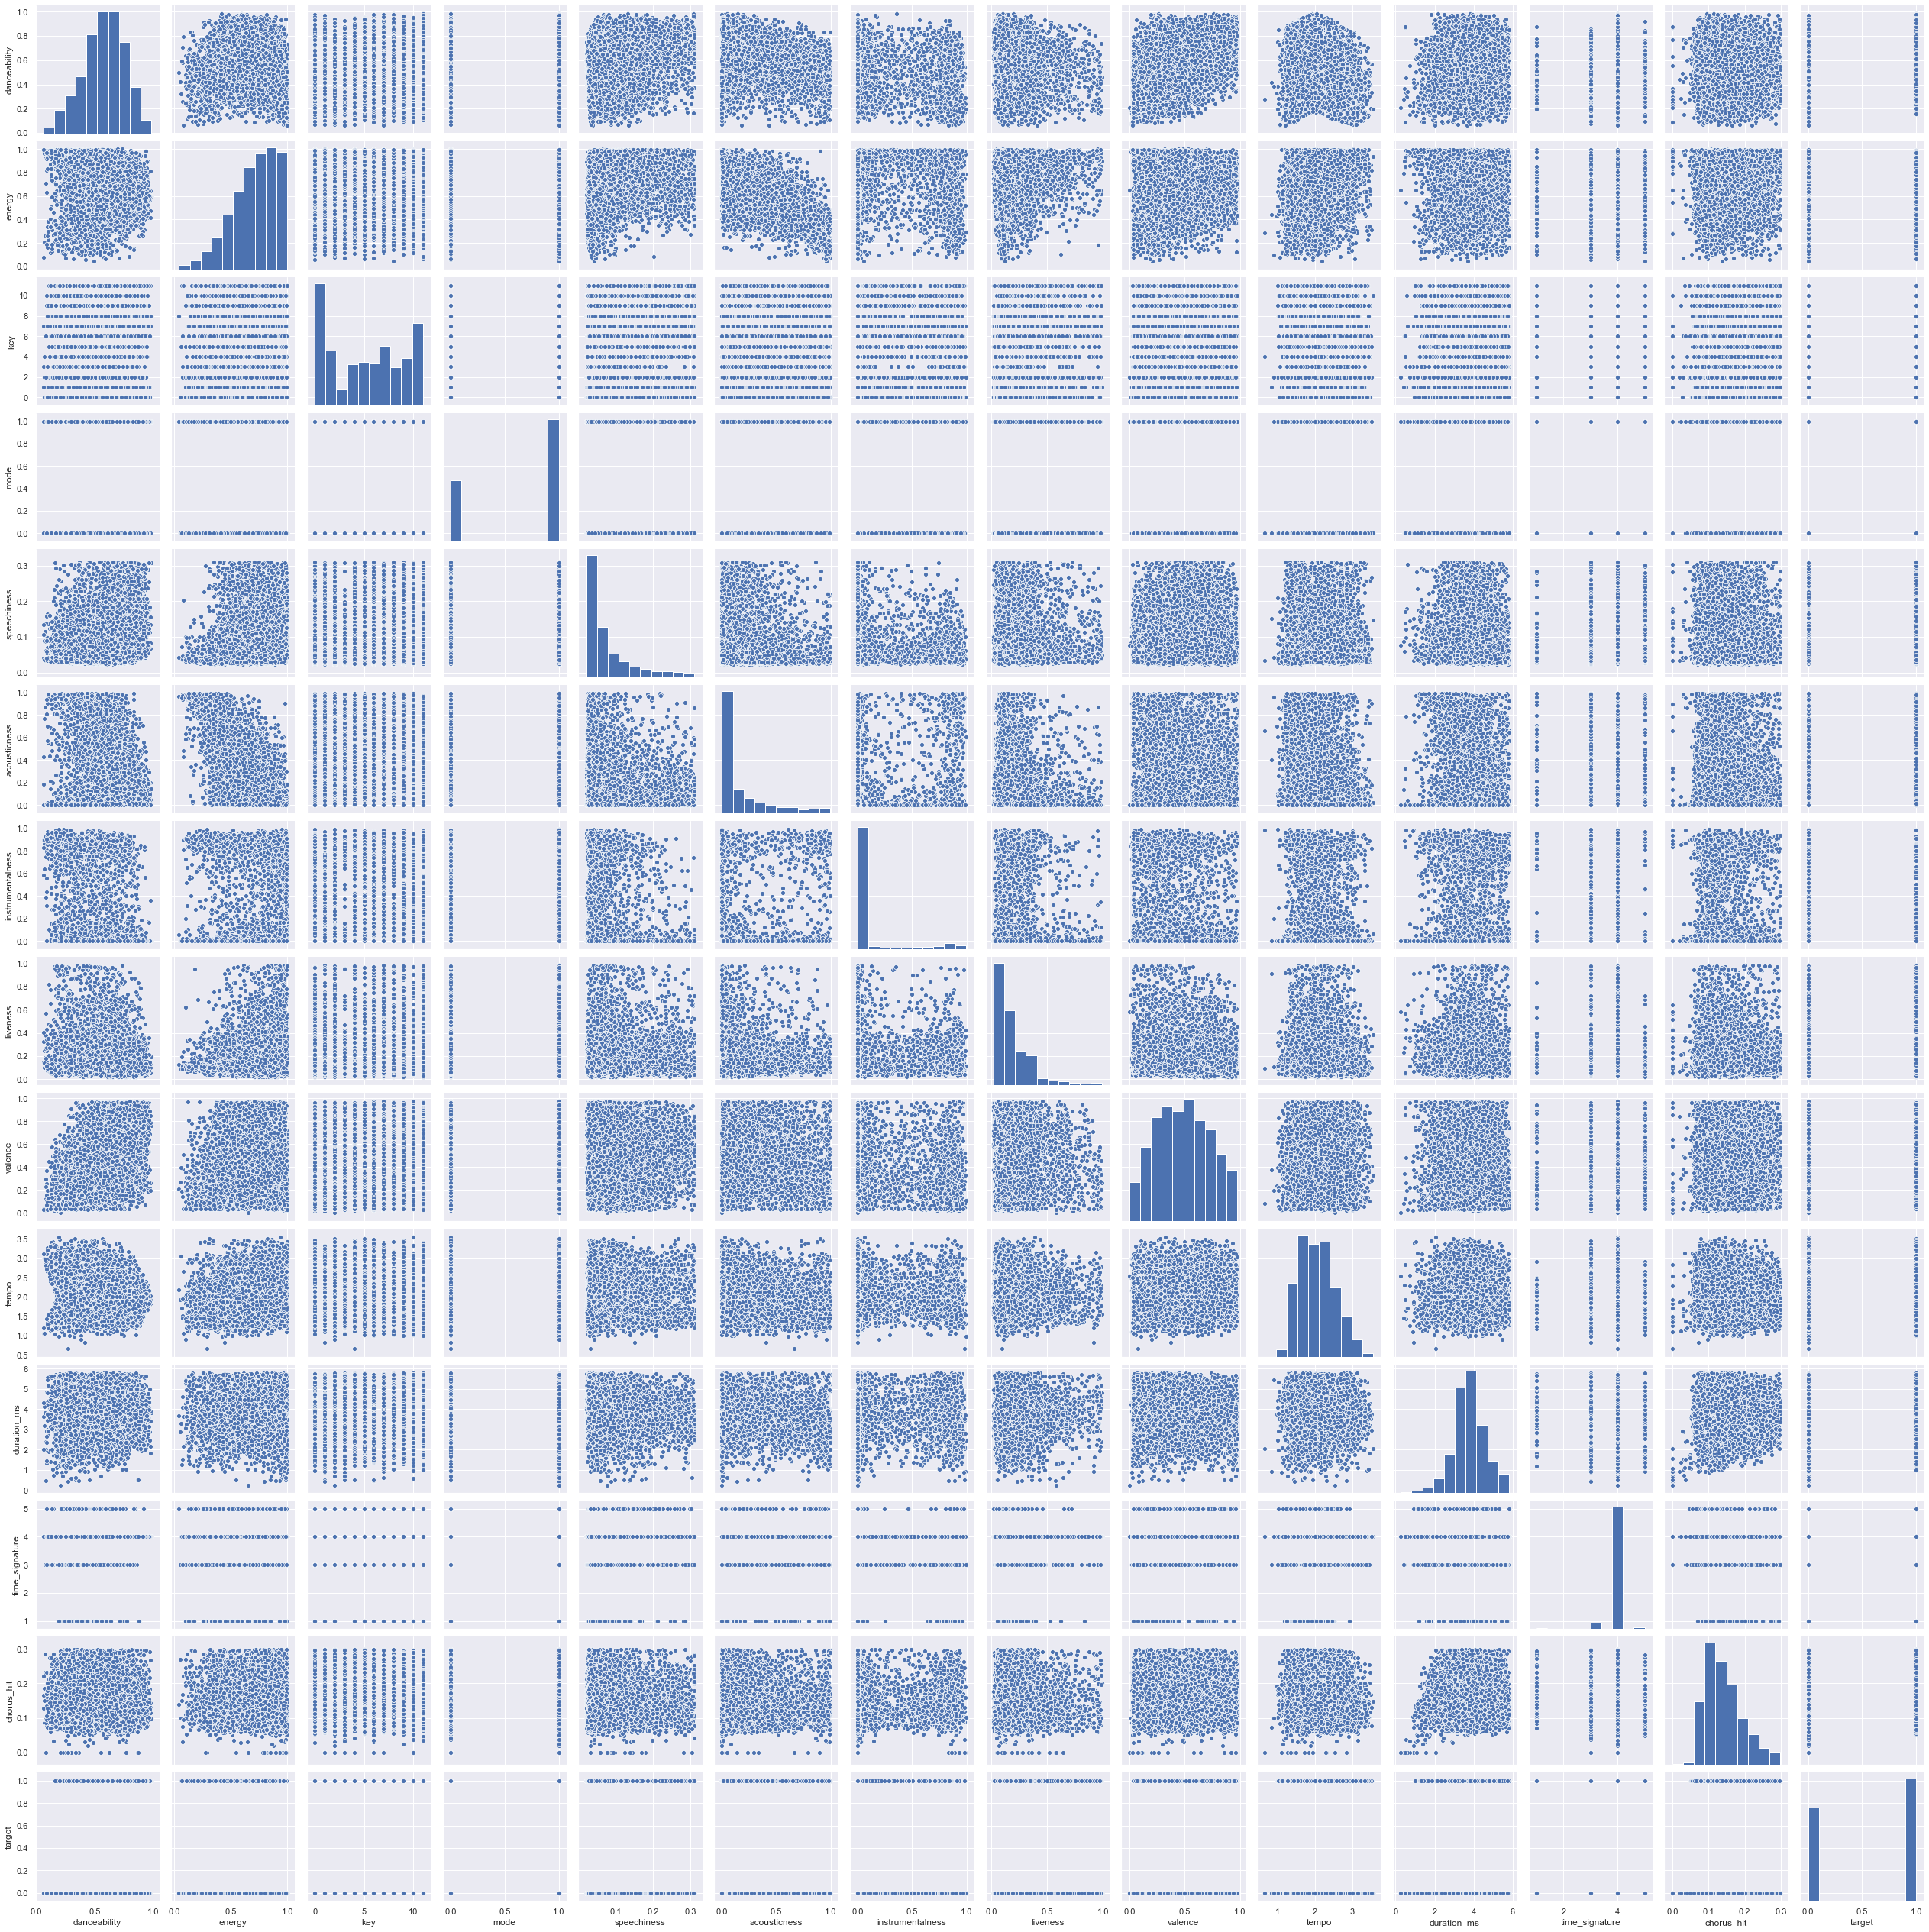

In [314]:
sns.pairplot(df_fin)

In [9]:
zzz=df_fin.drop(columns=['uri','track','artist','target'],axis=1)

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [11]:
vifs=pd.Series([VIF(zzz.values,i) for i in range(zzz.shape[1])],index=zzz.columns)

In [12]:
vifs[vifs>10]

danceability      15.274939
energy            27.477127
tempo             17.433720
duration_ms       31.067613
time_signature    61.599263
sections          32.297400
dtype: float64

In [13]:
def func(column, X):
    if column:
        X=X.drop(column, axis=1)
    vifs=pd.Series([VIF(X.values,i) for i in range(X.shape[1])],index=X.columns)
    display(vifs[vifs>10])
    return X

In [17]:
zzz=func('tempo',zzz)

danceability    10.85234
dtype: float64

#### Identifying any outliers

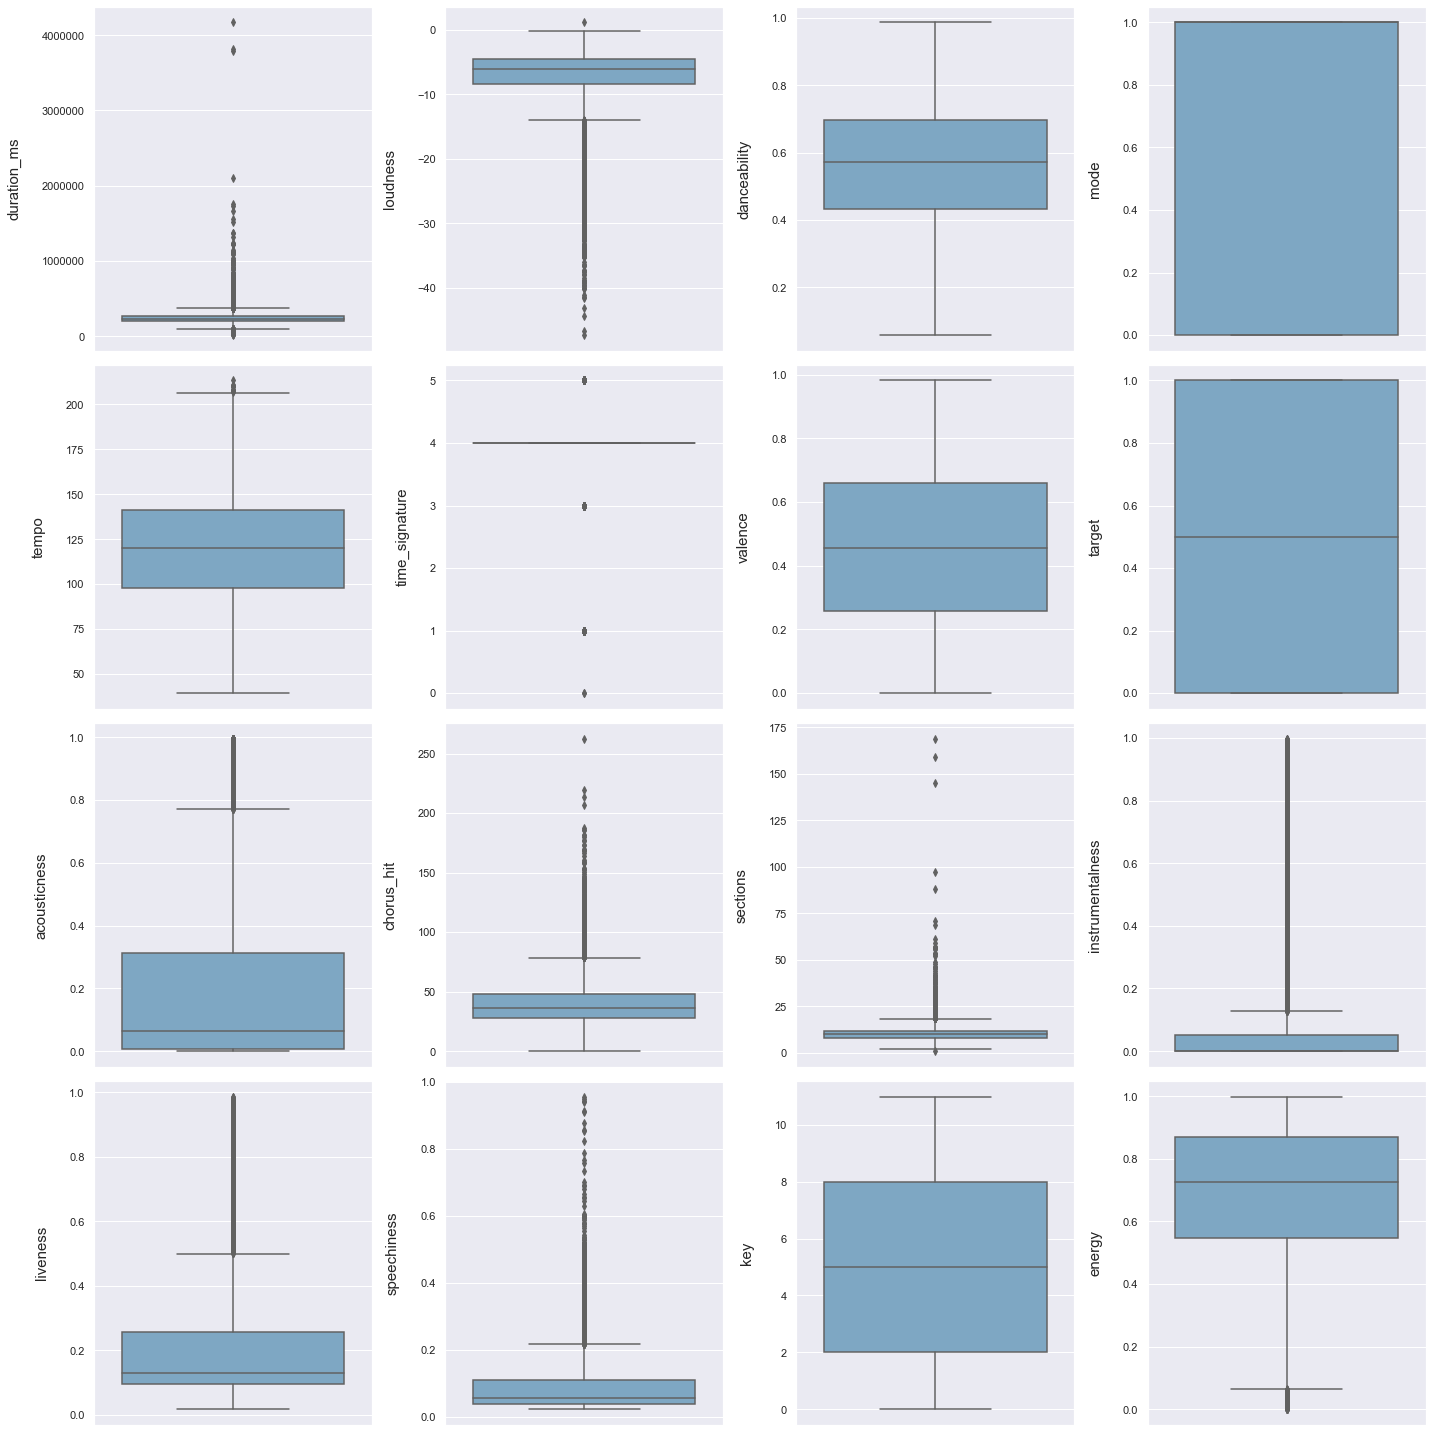

In [18]:
num_features=list(set(df_fin._get_numeric_data().columns)-set(['artist','uri','track']))

fig, axes=plt.subplots(4,4,figsize=(20,20))
for idx,feature in enumerate(num_features):
    ax=axes[idx//4,idx%4]
    sns.boxplot(y=df_fin[feature], ax=ax, palette='PuBu')
    ax.set_xlabel('', size=10)
    ax.set_ylabel(f'{feature}\n', size=15)
fig.tight_layout();

In [19]:
df_fin.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

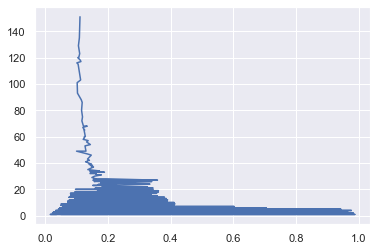

In [20]:
df_fin.liveness.value_counts().plot()

In [21]:
#Checking there is not null values
df_fin.isna().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

#### Feature Scaling

In [22]:
dum_lst=[]

In [23]:
# Key Feature: Consider as categorical and create dummy variables
df_fin.key.value_counts()

1     1374
0     1347
7     1319
2     1204
9     1118
11    1042
5      962
4      931
6      927
8      852
10     822
3      372
Name: key, dtype: int64

In [24]:
dum_lst.append('key')

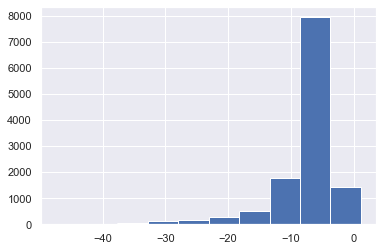

In [25]:
df_fin.loudness.hist()

In [26]:
# Dropping value greater than 0, as the scale stated is between 0 nad -60
df_fin.drop(df_fin.loc[df_fin.loudness>0].index, inplace=True)

In [27]:
# Re-scaling Loudness by dividing it by the max Decibel Level
df_fin.loudness=df_fin.loudness/60

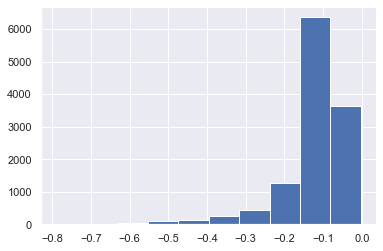

In [28]:
df_fin.loudness.hist()

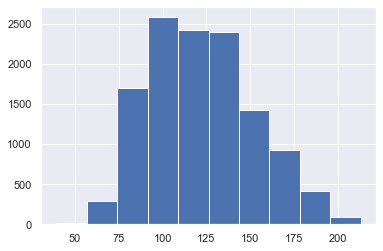

In [29]:
# Re-scaling Tempo
df_fin.tempo.hist()

In [30]:
# Given that Tempo is Beats Per Minute (BPM), we will divide by 60sec to transform it into Beats Per Second (BPS)
df_fin.tempo=df_fin.tempo/60

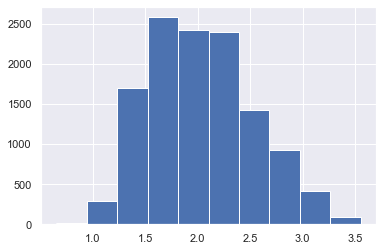

In [31]:
df_fin.tempo.hist()

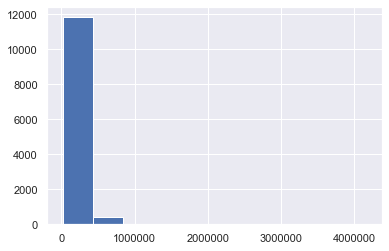

In [32]:
# Re-scaling duration from ms to min
df_fin.duration_ms.hist()

In [33]:
df_fin.duration_ms=df_fin.duration_ms/(60*1000)

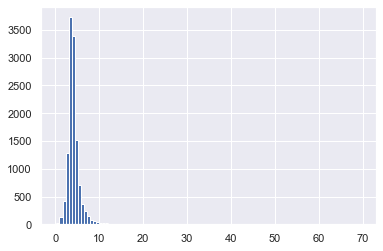

In [34]:
df_fin.duration_ms.hist(bins=100)

In [35]:
df_fin.loc[df_fin.duration_ms>20]

track  \
401                                             in vain   
651                   Evaroora - Mohanam - Misra Chappu   
1038                                      Friendly Folk   
1123                          Sri Venkatesa Suprabhatam   
1375                     Sri Venkateshwara Suprabhatham   
2264  Symphony No.3 "Symphony of Sorrowful Songs": 1...   
2266                                          Amériques   
3078  Thillana (Dr.Balamurali Krishna) - genre: Voca...   
3343                                    Improvisation 4   
3536                                         Dopesmoker   
3837                                    Inner Cities II   
3877                           Sri Lalitha Sahasranamam   
4139                                Ragam Tanam Pallavi   
4282                                       42 vexations   
4421                                      You're Nogood   
5536                     Maha Mrityunjaya Mantra, Pt. 1   
7302                                    Music for Sleep   

                       artist                                   uri  \
401      Georg Friedrich Haas  spotify:track:6vSXnHFYBwhkriLVx4Dhn4   
651   Neyyattinkara Vasudevan  spotify:track:1GESMbuEZlYThRwKIANXtR   
1038         Bernard Cribbins  spotify:track:4Q3Di21oOdH5ccVZ3lhl0k   
1123       M. S. Subbulakshmi  spotify:track:4sBnf3uV6Kbn9d8A3wtN0l   
1375       M. S. Subbulakshmi  spotify:track:5sEHcA6KQ0bmnbF9maaxUr   
2264           Henryk Górecki  spotify:track:6Vm7bkkEbvv4KgXJlC70iF   
2266            Edgard Varèse  spotify:track:1GT8y9YtzsSbT2mgtcoSCI   
3078     M. Balamuralikrishna  spotify:track:3mHYx9gxKRbWFjRCkAiTFG   
3343          Anthony Braxton  spotify:track:3RsOTsK2kDqw6809C4GLaZ   
3536                    Sleep  spotify:track:1vhvheW4R0KbK6Kr3NFplW   
3837             Alvin Curran  spotify:track:4mV8jh5GVX5xMhcGCFuRfN   
3877         Mambalam Sisters  spotify:track:08zwsTsonRiiiBIy4ghZNE   
4139              U. Srinivas  spotify:track:0k5Eg606HtFJU0pqQdgb53   
4282                  Dom Pub  spotify:track:60qgoupfzVr4Bccw5U1DAe   
4421              Terry Riley  spotify:track:5hViDivhqQcDso9cFahbnw   
5536            Suresh Wadkar  spotify:track:4OtK63pxEmKoAUzzxxk7t2   
7302               Dr. Sounds  spotify:track:7Ga4gIh4fp4wpmeXexxXbH   

      danceability   energy  key  loudness  mode  speechiness  acousticness  \
401          0.157  0.09410    0 -0.365717     1       0.0394       0.90500   
651          0.577  0.65700    7 -0.135500     1       0.1130       0.42000   
1038         0.663  0.27800    7 -0.275017     1       0.9500       0.59800   
1123         0.660  0.30100    7 -0.209150     1       0.7660       0.95000   
1375         0.655  0.40400    7 -0.122167     1       0.4800       0.96500   
2264         0.191  0.08350    4 -0.379183     0       0.0383       0.86200   
2266         0.209  0.27000    1 -0.338567     1       0.0682       0.36700   
3078         0.539  0.27100    5 -0.234883     1       0.1820       0.84900   
3343         0.291  0.28100    5 -0.236633     1       0.0343       0.96100   
3536         0.160  0.57200    5 -0.115817     1       0.0321       0.00367   
3837         0.362  0.00131    1 -0.527767     0       0.0585       0.99500   
3877         0.701  0.24700    6 -0.210917     1       0.1440       0.77800   
4139         0.363  0.28600    3 -0.204300     0       0.0449       0.98400   
4282         0.675  0.00766   11 -0.543067     1       0.3000       0.99600   
4421         0.341  0.49300   10 -0.241250     1       0.0463       0.38500   
5536         0.489  0.26700    0 -0.275633     1       0.0478       0.86600   
7302         0.163  0.00547    9 -0.571400     0       0.0532       0.99000   

      instrumentalness  liveness  valence     tempo  duration_ms  \
401           0.750000    0.3320   0.0246  2.218567    63.191333   
651           0.001290    0.0859   0.2980  2.541950    27.685333   
1038          0.000001    0.0875   0.3800  1.567950    22.829550   
1123         

In [36]:
# Time-Signature: Consider as a Dummy Variable
df_fin.time_signature.value_counts()

4    11106
3      862
5      205
1       94
0        2
Name: time_signature, dtype: int64

In [37]:
dum_lst.append('time_signature')

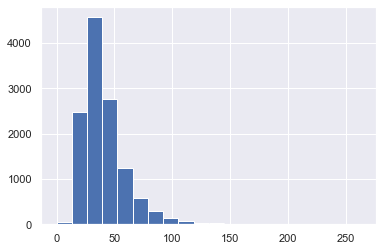

In [38]:
# Re-scaling Chorus Hit by using Standard Scaler function from SKLearn / TRY ROBUST SCALER LATER
df_fin.chorus_hit.hist(bins=20)

In [39]:
df_fin['chorus_hit'].values.reshape(df_fin.shape[0],1)

array([[30.88059],
       [41.51106],
       [65.32887],
       ...,
       [20.73371],
       [21.65301],
       [71.05343]])

In [40]:
scaler=MinMaxScaler()
df_fin.chorus_hit=scaler.fit_transform(df_fin['chorus_hit'].values.reshape(df_fin.shape[0],1))

In [41]:
df_fin['chorus_hit']

0        0.117589
1        0.158068
2        0.248763
3        0.223122
4        0.086148
           ...   
12265    0.092562
12266    0.123902
12267    0.078951
12268    0.082451
12269    0.270561
Name: chorus_hit, Length: 12269, dtype: float64

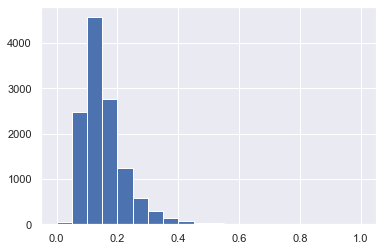

In [42]:
df_fin.chorus_hit.hist(bins=20)

In [43]:
# Sections
df_fin.sections.value_counts(ascending=False)

9     1787
10    1756
11    1559
8     1331
12    1255
      ... 
61       1
69       1
54       1
39       1
43       1
Name: sections, Length: 62, dtype: int64

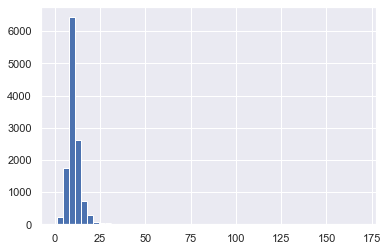

In [44]:
df_fin.sections.hist(bins=50)

In [45]:
scaler=MinMaxScaler()
df_fin.sections=scaler.fit_transform(df_fin['sections'].values.reshape(df_fin.shape[0],1))


In [46]:
df_fin['sections'].values.reshape(df_fin.shape[0],1)

array([[0.07142857],
       [0.05357143],
       [0.07142857],
       ...,
       [0.03571429],
       [0.07738095],
       [0.08333333]])

In [47]:
df_fin.sections

0        0.071429
1        0.053571
2        0.071429
3        0.047619
4        0.053571
           ...   
12265    0.035714
12266    0.041667
12267    0.035714
12268    0.077381
12269    0.083333
Name: sections, Length: 12269, dtype: float64

#### Dropping all outliers > 95th percentile on column feature 
###### Sections, Loudness, Chorus Hit, Speechiness, Duration ms

In [48]:
df_fin.shape

(12269, 19)

In [49]:
df_fin=df_fin.drop(df_fin.loc[df_fin['sections'] > df_fin['sections'].quantile(q=0.95)].index)


In [50]:
df_fin.shape

(11761, 19)

In [51]:
df_fin=df_fin.drop(df_fin.loc[df_fin['loudness'] > df_fin['loudness'].quantile(q=0.95)].index)

In [52]:
df_fin.shape

(11173, 19)

In [53]:
df_fin=df_fin.drop(df_fin.loc[df_fin['chorus_hit'] > df_fin['chorus_hit'].quantile(q=0.95)].index)

In [54]:
df_fin.shape

(10614, 19)

In [55]:
df_fin=df_fin.drop(df_fin.loc[df_fin['speechiness'] > df_fin['speechiness'].quantile(q=0.95)].index)

In [56]:
df_fin.shape

(10086, 19)

In [57]:
df_fin=df_fin.drop(df_fin.loc[df_fin['duration_ms'] > df_fin['duration_ms'].quantile(q=0.95)].index)

In [58]:
df_fin.shape

(9581, 19)

In [59]:
df_fin=df_fin.drop(df_fin.loc[df_fin['loudness'] < df_fin['loudness'].quantile(q=0.05)].index)

In [60]:
df_fin.shape

(9103, 19)

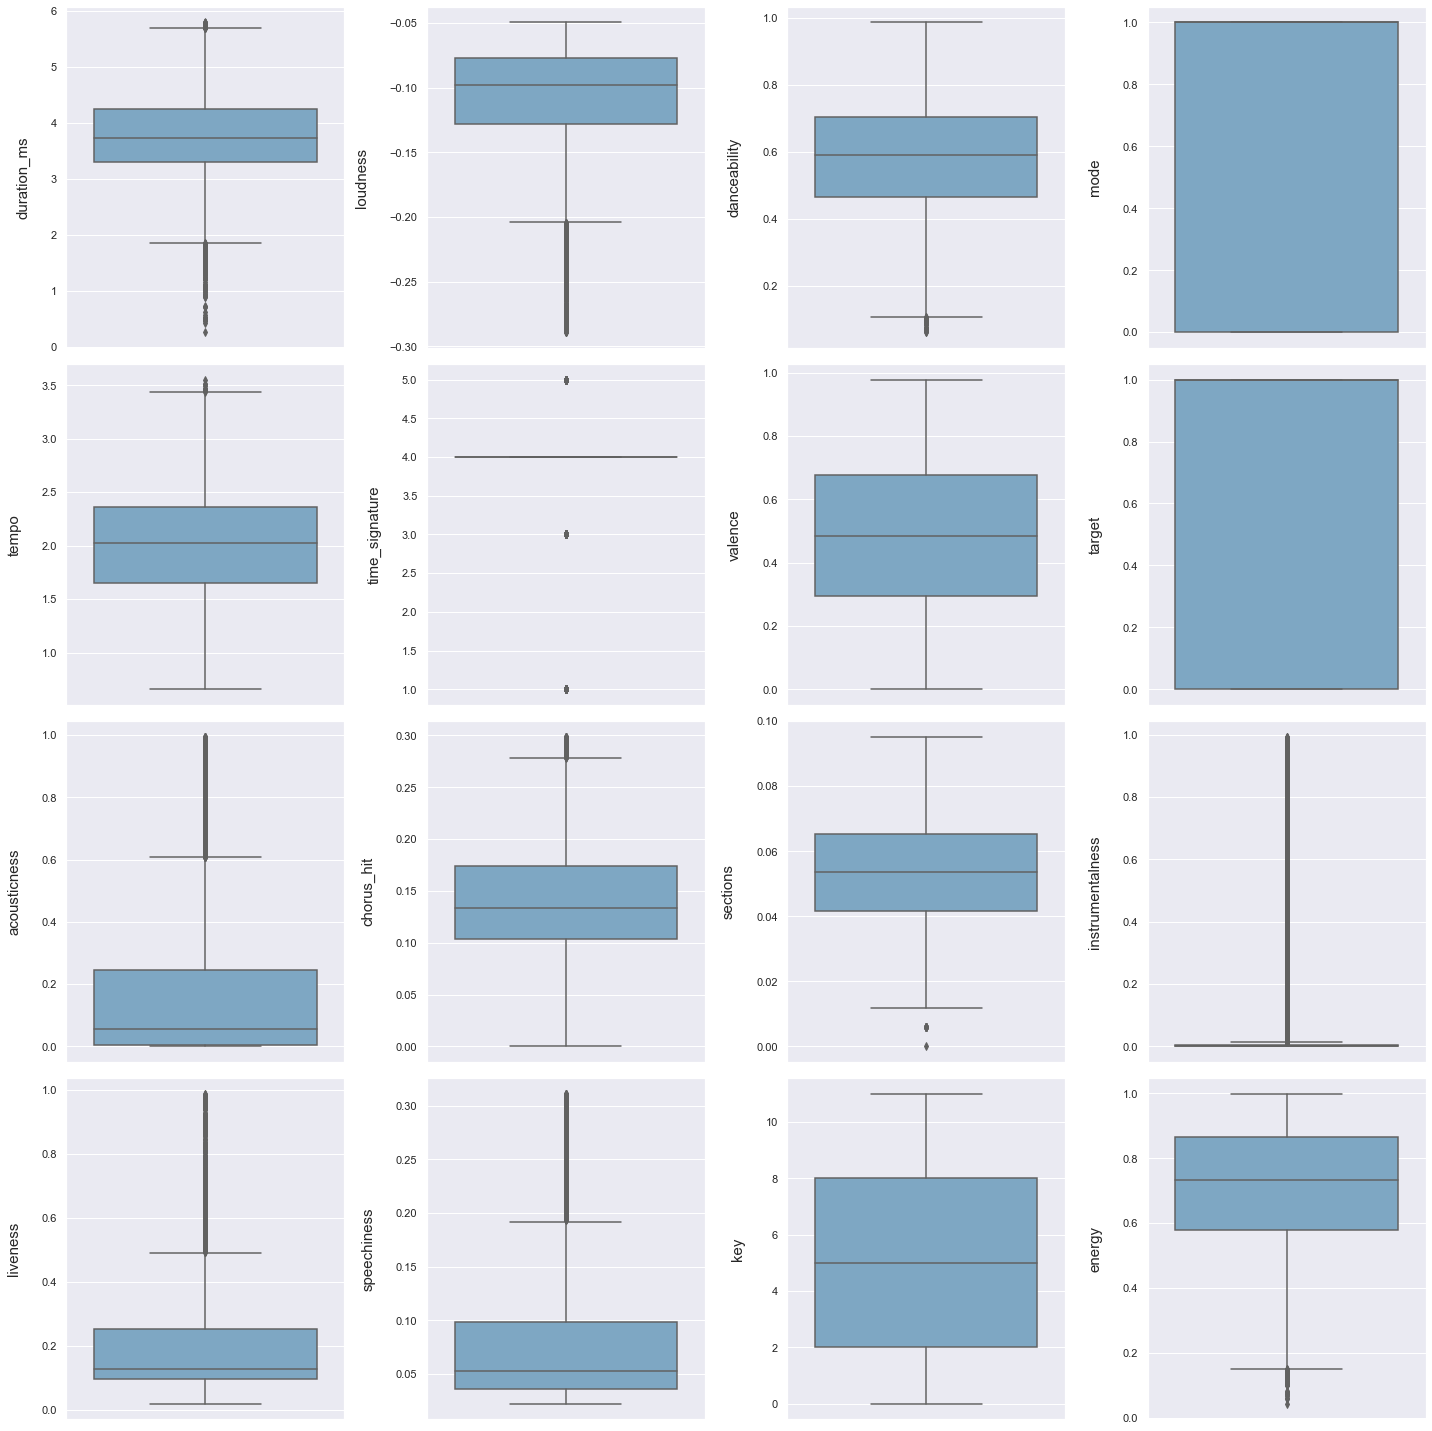

In [61]:
num_features=list(set(df_fin._get_numeric_data().columns)-set(['artist','uri','track']))

fig, axes=plt.subplots(4,4,figsize=(20,20))
for idx,feature in enumerate(num_features):
    ax=axes[idx//4,idx%4]
    sns.boxplot(y=df_fin[feature], ax=ax, palette='PuBu')
    ax.set_xlabel('', size=10)
    ax.set_ylabel(f'{feature}\n', size=15)
fig.tight_layout();

#### Dropping Columns with High Correlations

In [62]:
#Dropping first 3 columns as they dont affect my analysis
df_fin.drop(columns=['track','artist','uri'], axis=1, inplace=True)

In [63]:
df_fin.drop(columns=['sections','loudness'], axis=1, inplace=True)

In [64]:
df_fin.reset_index()

index  danceability  energy  key  mode  speechiness  acousticness  \
0         0         0.578   0.471    4     1       0.0289      0.368000   
1         1         0.704   0.854   10     0       0.1830      0.018500   
2         2         0.162   0.836    9     1       0.0473      0.000111   
3         3         0.188   0.994    4     1       0.1660      0.000007   
4         4         0.630   0.764    2     1       0.0275      0.363000   
...     ...           ...     ...  ...   ...          ...           ...   
9098  12264         0.780   0.784    1     1       0.1860      0.044700   
9099  12265         0.172   0.358    9     1       0.0342      0.886000   
9100  12266         0.910   0.366    1     1       0.0941      0.099600   
9101  12267         0.719   0.804   10     1       0.0355      0.013200   
9102  12268         0.600   0.177    7     1       0.0561      0.989000   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.000000     0.159   0.5320  2.217683     3.278450   
1             0.000000     0.148   0.6880  1.549800     4.043117   
2             0.004570     0.174   0.3000  1.449400     5.648217   
3             0.078400     0.192   0.3330  2.474000     4.261117   
4             0.000000     0.125   0.6310  1.868300     3.229333   
...                ...       ...      ...       ...          ...   
9098          0.000000     0.122   0.4300  1.417050     3.011767   
9099          0.966000     0.314   0.0361  1.204533     2.514283   
9100          0.000000     0.261   0.7400  1.999750     2.533333   
9101          0.000003     0.139   0.6050  1.999983     3.796000   
9102          0.868000     0.149   0.5600  2.000500     3.556450   

      time_signature  chorus_hit  target  
0                  4    0.117589       1  
1                  4    0.158068       1  
2                  4    0.248763       0  
3                  4    0.223122       0  
4                  4    0.086148       1  
...              ...         ...     ...  
9098               4    0.177533       1  
9099               4    0.092562       0  
9100               4    0.123902       1  
9101               4    0.078951       1  
9102               4    0.082451       0  

[9103 rows x 15 columns]

In [65]:
#Create a new DF df_fin_1 with Dummy Variables 
#NOTE: I will not drop first column since I will undergo feature engineering that doesnt require dropping it
df_fin_1=pd.get_dummies(data=df_fin, columns=dum_lst)

In [66]:
df_fin_1.reset_index()

index  danceability  energy  mode  speechiness  acousticness  \
0         0         0.578   0.471     1       0.0289      0.368000   
1         1         0.704   0.854     0       0.1830      0.018500   
2         2         0.162   0.836     1       0.0473      0.000111   
3         3         0.188   0.994     1       0.1660      0.000007   
4         4         0.630   0.764     1       0.0275      0.363000   
...     ...           ...     ...   ...          ...           ...   
9098  12264         0.780   0.784     1       0.1860      0.044700   
9099  12265         0.172   0.358     1       0.0342      0.886000   
9100  12266         0.910   0.366     1       0.0941      0.099600   
9101  12267         0.719   0.804     1       0.0355      0.013200   
9102  12268         0.600   0.177     1       0.0561      0.989000   

      instrumentalness  liveness  valence     tempo  ...  key_6  key_7  key_8  \
0             0.000000     0.159   0.5320  2.217683  ...      0      0      0   
1             0.000000     0.148   0.6880  1.549800  ...      0      0      0   
2             0.004570     0.174   0.3000  1.449400  ...      0      0      0   
3             0.078400     0.192   0.3330  2.474000  ...      0      0      0   
4             0.000000     0.125   0.6310  1.868300  ...      0      0      0   
...                ...       ...      ...       ...  ...    ...    ...    ...   
9098          0.000000     0.122   0.4300  1.417050  ...      0      0      0   
9099          0.966000     0.314   0.0361  1.204533  ...      0      0      0   
9100          0.000000     0.261   0.7400  1.999750  ...      0      0      0   
9101          0.000003     0.139   0.6050  1.999983  ...      0      0      0   
9102          0.868000     0.149   0.5600  2.000500  ...      0      1      0   

      key_9  key_10  key_11  time_signature_1  time_signature_3  \
0         0       0       0                 0                 0   
1         0       1       0                 0                 0   
2         1       0       0                 0                 0   
3         0       0       0                 0                 0   
4         0       0       0                 0                 0   
...     ...     ...     ...               ...               ...   
9098      0       0       0                 0                 0   
9099      1       0       0                 0                 0   
9100      0       0       0                 0                 0   
9101      0       1       0                 0                 0   
9102      0       0       0                 0                 0   

      time_signature_4  time_signature_5  
0                    1                 0  
1                    1                 0  
2                    1                 0  
3                    1                 0  
4                    1                 0  
...                ...               ...  
9098                 1                 0  
9099                 1                 0  
9100                 1                 0  
9101                 1                 0  
9102                 1                 0  

[9103 rows x 29 columns]

In [67]:
df_fin_1.dtypes

danceability        float64
energy              float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
chorus_hit          float64
target                int64
key_0                 uint8
key_1                 uint8
key_2                 uint8
key_3                 uint8
key_4                 uint8
key_5                 uint8
key_6                 uint8
key_7                 uint8
key_8                 uint8
key_9                 uint8
key_10                uint8
key_11                uint8
time_signature_1      uint8
time_signature_3      uint8
time_signature_4      uint8
time_signature_5      uint8
dtype: object

#### Filter Based Feature Selection Method

In [68]:
selection=SelectKBest(f_classif, k=7)

In [69]:
y1=df_fin_1['target']

In [70]:
X1=df_fin_1.drop('target',axis=1)

In [71]:
X1

danceability  energy  mode  speechiness  acousticness  \
0             0.578   0.471     1       0.0289      0.368000   
1             0.704   0.854     0       0.1830      0.018500   
2             0.162   0.836     1       0.0473      0.000111   
3             0.188   0.994     1       0.1660      0.000007   
4             0.630   0.764     1       0.0275      0.363000   
...             ...     ...   ...          ...           ...   
12264         0.780   0.784     1       0.1860      0.044700   
12265         0.172   0.358     1       0.0342      0.886000   
12266         0.910   0.366     1       0.0941      0.099600   
12267         0.719   0.804     1       0.0355      0.013200   
12268         0.600   0.177     1       0.0561      0.989000   

       instrumentalness  liveness  valence     tempo  duration_ms  ...  key_6  \
0              0.000000     0.159   0.5320  2.217683     3.278450  ...      0   
1              0.000000     0.148   0.6880  1.549800     4.043117  ...      0   
2              0.004570     0.174   0.3000  1.449400     5.648217  ...      0   
3              0.078400     0.192   0.3330  2.474000     4.261117  ...      0   
4              0.000000     0.125   0.6310  1.868300     3.229333  ...      0   
...                 ...       ...      ...       ...          ...  ...    ...   
12264          0.000000     0.122   0.4300  1.417050     3.011767  ...      0   
12265          0.966000     0.314   0.0361  1.204533     2.514283  ...      0   
12266          0.000000     0.261   0.7400  1.999750     2.533333  ...      0   
12267          0.000003     0.139   0.6050  1.999983     3.796000  ...      0   
12268          0.868000     0.149   0.5600  2.000500     3.556450  ...      0   

       key_7  key_8  key_9  key_10  key_11  time_signature_1  \
0          0      0      0       0       0                 0   
1          0      0      0       1       0                 0   
2          0      0      1       0       0                 0   
3          0      0      0       0       0                 0   
4          0      0      0       0       0                 0   
...      ...    ...    ...     ...     ...               ...   
12264      0      0      0       0       0                 0   
12265      0      0      1       0       0                 0   
12266      0      0      0       0       0                 0   
12267      0      0      0       1       0                 0   
12268      1      0      0       0       0                 0   

       time_signature_3  time_signature_4  time_signature_5  
0                     0                 1                 0  
1                     0                 1                 0  
2                     0                 1                 0  
3                     0                 1                 0  
4                     0                 1                 0  
...                 ...               ...               ...  
12264                 0                 1                 0  
12265                 0                 1                 0  
12266                 0                 1                 0  
12267                 0                 1                 0  
12268                 0                 1                 0  

[9103 rows x 27 columns]

In [72]:
selection.fit(X1,y1)

SelectKBest(k=7, score_func=<function f_classif at 0x1a18a72950>)

In [73]:
X_1_t=selection.transform(X1)

In [74]:
X_1_t=pd.DataFrame(X_1_t)

In [75]:
# Features Selected Danceability, Energy, Acousticness, Instrumantalness, Valence, Time Signature 3, Time Signature 4

In [76]:
selection=SelectKBest(chi2, k=7)

In [77]:
selection.fit(X1,y1)

SelectKBest(k=7, score_func=<function chi2 at 0x1a18a724d0>)

In [78]:
X_2_t=selection.transform(X1)

In [79]:
X_2_t=pd.DataFrame(X_2_t)

In [80]:
X_2_t

0         1         2      3       4    5    6
0     0.578  0.368000  0.000000  0.159  0.5320  0.0  0.0
1     0.704  0.018500  0.000000  0.148  0.6880  0.0  0.0
2     0.162  0.000111  0.004570  0.174  0.3000  0.0  0.0
3     0.188  0.000007  0.078400  0.192  0.3330  0.0  0.0
4     0.630  0.363000  0.000000  0.125  0.6310  0.0  0.0
...     ...       ...       ...    ...     ...  ...  ...
9098  0.780  0.044700  0.000000  0.122  0.4300  0.0  0.0
9099  0.172  0.886000  0.966000  0.314  0.0361  0.0  0.0
9100  0.910  0.099600  0.000000  0.261  0.7400  0.0  0.0
9101  0.719  0.013200  0.000003  0.139  0.6050  0.0  0.0
9102  0.600  0.989000  0.868000  0.149  0.5600  0.0  0.0

[9103 rows x 7 columns]

In [81]:
# Features Selected: Danceability, Acousticness, Instrumantalness, Valence, ...

#### Wrappers Method

In [82]:
# RFE - Logistic Regression
estimator=LogisticRegression(max_iter=1000)

In [83]:
selector=RFE(estimator, 7)

In [84]:
selector.fit(X1,y1)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=1000,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=7, step=1, verbose=0)

In [85]:
X1.columns[selector.support_].to_list()

['danceability',
 'energy',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence']

In [86]:
X_3_t=df_fin_1[X1.columns[selector.support_].to_list()]

In [87]:
X_3_t

danceability  energy  speechiness  acousticness  instrumentalness  \
0             0.578   0.471       0.0289      0.368000          0.000000   
1             0.704   0.854       0.1830      0.018500          0.000000   
2             0.162   0.836       0.0473      0.000111          0.004570   
3             0.188   0.994       0.1660      0.000007          0.078400   
4             0.630   0.764       0.0275      0.363000          0.000000   
...             ...     ...          ...           ...               ...   
12264         0.780   0.784       0.1860      0.044700          0.000000   
12265         0.172   0.358       0.0342      0.886000          0.966000   
12266         0.910   0.366       0.0941      0.099600          0.000000   
12267         0.719   0.804       0.0355      0.013200          0.000003   
12268         0.600   0.177       0.0561      0.989000          0.868000   

       liveness  valence  
0         0.159   0.5320  
1         0.148   0.6880  
2         0.174   0.3000  
3         0.192   0.3330  
4         0.125   0.6310  
...         ...      ...  
12264     0.122   0.4300  
12265     0.314   0.0361  
12266     0.261   0.7400  
12267     0.139   0.6050  
12268     0.149   0.5600  

[9103 rows x 7 columns]

In [88]:
# Features Selected: danceability, energy, speechiness, acousticness, instrumentalness, liveness, valence

In [89]:
# SFS - Logistic Regression
estimator=LogisticRegression(max_iter=1000)
s1=sfs(estimator, 7, forward=True).fit(X1,y1)
s1.get_metric_dict()
s1.get_metric_dict()[7]['feature_names']

('danceability',
 'energy',
 'mode',
 'acousticness',
 'instrumentalness',
 'tempo',
 'key_11')

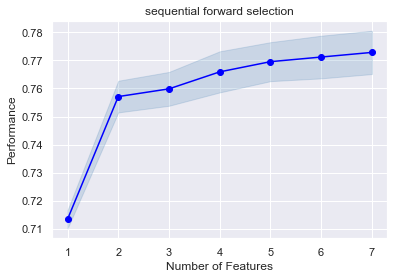

In [90]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig=plot_sfs(s1.get_metric_dict(), kind='std_err')
plt.title("sequential forward selection")
plt.show()

In [91]:
# PCA

In [92]:
pca1=PCA(0.9)

In [93]:
X_4_t=pd.DataFrame(pca1.fit_transform(X1))

#### Modeling

In [94]:
# Splitting and Assigning Test and Train for 4 optimized DF

In [95]:
X_1_ttrain, X_1_ttest, y_1_ttrain, y_1_ttest = train_test_split(X_1_t, y1, test_size=0.3, random_state=42, stratify=y1)

In [96]:
X_2_ttrain, X_2_ttest, y_2_ttrain, y_2_ttest = train_test_split(X_2_t, y1, test_size=0.3, random_state=42, stratify=y1)

In [97]:
#Getting different indexes! WEIRD! Ask why
X_3_ttrain, X_3_ttest, y_3_ttrain, y_3_ttest = train_test_split(X_3_t, y1, test_size=0.3, random_state=42, stratify=y1)

In [98]:
X_3_ttrain

danceability  energy  speechiness  acousticness  instrumentalness  \
3402         0.364   0.502       0.2640      0.901000          0.000000   
9419         0.817   0.827       0.0435      0.239000          0.000000   
9688         0.783   0.660       0.0465      0.148000          0.000000   
9194         0.446   0.894       0.0659      0.000037          0.265000   
2983         0.727   0.649       0.0338      0.661000          0.000000   
...            ...     ...          ...           ...               ...   
7566         0.483   0.844       0.0314      0.004810          0.000073   
583          0.836   0.491       0.1900      0.139000          0.000000   
197          0.598   0.808       0.0388      0.003040          0.000000   
5876         0.807   0.887       0.2750      0.003810          0.000000   
2925         0.727   0.714       0.0872      0.020900          0.000000   

      liveness  valence  
3402    0.1150    0.800  
9419    0.0712    0.789  
9688    0.0739    0.475  
9194    0.0306    0.612  
2983    0.1110    0.669  
...        ...      ...  
7566    0.4050    0.543  
583     0.0489    0.862  
197     0.1470    0.288  
5876    0.3910    0.780  
2925    0.1530    0.618  

[6372 rows x 7 columns]

In [99]:
X_4_ttrain, X_4_ttest, y_4_ttrain, y_4_ttest = train_test_split(X_4_t, y1, test_size=0.3, random_state=42, stratify=y1)

In [100]:
# Logistic Regression Model
y_1_ttrain.value_counts(normalize=True)

1    0.567326
0    0.432674
Name: target, dtype: float64

In [101]:
y_1_ttest.value_counts(normalize=True)

1    0.567192
0    0.432808
Name: target, dtype: float64

In [102]:
# F-Classification DF
model1=LogisticRegression(max_iter=10000, class_weight='balanced')
model1.fit(X_1_ttrain,y_1_ttrain)
pred1=model1.predict(X_1_ttest)
conf1=confusion_matrix(y_1_ttest, pred1)
ac1=accuracy_score(y_1_ttest, pred1)

In [103]:
conf1

array([[ 734,  448],
       [ 225, 1324]])

In [104]:
ac1

0.7535701208348591

In [105]:
# Iterating over Probability threshold to get the largest accuracy

In [106]:
thresholds=np.linspace(0,1,100)

In [107]:
y_pred_new={i:(model1.predict_proba(X_1_ttest)[:,1]>i).astype(int) for i in thresholds}

In [124]:
y_pred_new

{0.0: array([1, 1, 1, ..., 1, 1, 1]),
 0.010101010101010102: array([1, 1, 1, ..., 1, 1, 1]),
 0.020202020202020204: array([1, 1, 1, ..., 1, 1, 1]),
 0.030303030303030304: array([1, 1, 1, ..., 1, 1, 1]),
 0.04040404040404041: array([1, 1, 1, ..., 1, 1, 1]),
 0.05050505050505051: array([1, 1, 1, ..., 1, 1, 1]),
 0.06060606060606061: array([1, 1, 1, ..., 1, 1, 1]),
 0.07070707070707072: array([1, 1, 1, ..., 1, 1, 1]),
 0.08080808080808081: array([1, 1, 1, ..., 1, 1, 1]),
 0.09090909090909091: array([1, 1, 1, ..., 1, 1, 1]),
 0.10101010101010102: array([1, 1, 1, ..., 1, 1, 1]),
 0.11111111111111112: array([1, 1, 1, ..., 1, 1, 1]),
 0.12121212121212122: array([1, 1, 1, ..., 1, 1, 1]),
 0.13131313131313133: array([1, 1, 1, ..., 1, 1, 1]),
 0.14141414141414144: array([1, 1, 1, ..., 1, 1, 1]),
 0.15151515151515152: array([1, 1, 1, ..., 1, 1, 1]),
 0.16161616161616163: array([1, 1, 1, ..., 1, 1, 1]),
 0.17171717171717174: array([1, 1, 1, ..., 1, 1, 1]),
 0.18181818181818182: array([1, 1, 1, ...

In [108]:
dct={}
for x,y in y_pred_new.items():
    conf=confusion_matrix(y_1_ttest, y)
    ac=accuracy_score(y_1_ttest, y)
    dct[x]=ac
    print(round(x,3))
    print(conf)
    print(round(ac,3),"\n")

print('\nOptimal Threshold and Corresponding Accuracy: ',max(dct.items(), key = lambda x: x[1]))

0.0
[[   0 1182]
 [   0 1549]]
0.567 

0.01
[[ 209  973]
 [   3 1546]]
0.643 

0.02
[[ 261  921]
 [   5 1544]]
0.661 

0.03
[[ 284  898]
 [   6 1543]]
0.669 

0.04
[[ 300  882]
 [   7 1542]]
0.674 

0.051
[[ 314  868]
 [   7 1542]]
0.68 

0.061
[[ 319  863]
 [   7 1542]]
0.681 

0.071
[[ 324  858]
 [   9 1540]]
0.683 

0.081
[[ 327  855]
 [   9 1540]]
0.684 

0.091
[[ 332  850]
 [   9 1540]]
0.685 

0.101
[[ 335  847]
 [   9 1540]]
0.687 

0.111
[[ 344  838]
 [   9 1540]]
0.69 

0.121
[[ 349  833]
 [   9 1540]]
0.692 

0.131
[[ 356  826]
 [   9 1540]]
0.694 

0.141
[[ 361  821]
 [   9 1540]]
0.696 

0.152
[[ 362  820]
 [   9 1540]]
0.696 

0.162
[[ 367  815]
 [   9 1540]]
0.698 

0.172
[[ 373  809]
 [   9 1540]]
0.7 

0.182
[[ 379  803]
 [   9 1540]]
0.703 

0.192
[[ 383  799]
 [  11 1538]]
0.703 

0.202
[[ 391  791]
 [  13 1536]]
0.706 

0.212
[[ 398  784]
 [  13 1536]]
0.708 

0.222
[[ 404  778]
 [  16 1533]]
0.709 

0.232
[[ 408  774]
 [  18 1531]]
0.71 

0.242
[[ 420  762]
 [  19 1

In [109]:
# Chi-2 DF
model2=LogisticRegression(max_iter=10000, class_weight='balanced')
model2.fit(X_2_ttrain,y_2_ttrain)
pred2=model2.predict(X_2_ttest)
conf2=confusion_matrix(y_2_ttest, pred2)
ac2=accuracy_score(y_2_ttest, pred2)

In [110]:
conf2

array([[ 734,  448],
       [ 225, 1324]])

In [111]:
ac2

0.7535701208348591

In [112]:
# RFE-LogReg DF
model3=LogisticRegression(max_iter=10000, class_weight='balanced')
model3.fit(X_3_ttrain,y_3_ttrain)
pred3=model3.predict(X_3_ttest)
conf3=confusion_matrix(y_3_ttest, pred3)
ac3=accuracy_score(y_3_ttest, pred3)

In [113]:
conf3

array([[ 750,  432],
       [ 223, 1326]])

In [114]:
ac3

0.760161113145368

In [115]:
y_pred_new={i:(model3.predict_proba(X_3_ttest)[:,1]>i).astype(int) for i in thresholds}
dct={}
for x,y in y_pred_new.items():
    conf=confusion_matrix(y_3_ttest, y)
    ac=accuracy_score(y_3_ttest, y)
    dct[x]=ac
    print(round(x,3))
    print(conf)
    print(round(ac,3),"\n")

print('\nOptimal Threshold and Corresponding Accuracy: ',max(dct.items(), key = lambda x: x[1]))

0.0
[[   0 1182]
 [   0 1549]]
0.567 

0.01
[[ 215  967]
 [   3 1546]]
0.645 

0.02
[[ 255  927]
 [   5 1544]]
0.659 

0.03
[[ 284  898]
 [   6 1543]]
0.669 

0.04
[[ 300  882]
 [   7 1542]]
0.674 

0.051
[[ 311  871]
 [   8 1541]]
0.678 

0.061
[[ 321  861]
 [   8 1541]]
0.682 

0.071
[[ 328  854]
 [   8 1541]]
0.684 

0.081
[[ 332  850]
 [   9 1540]]
0.685 

0.091
[[ 337  845]
 [   9 1540]]
0.687 

0.101
[[ 342  840]
 [   9 1540]]
0.689 

0.111
[[ 346  836]
 [   9 1540]]
0.691 

0.121
[[ 350  832]
 [   9 1540]]
0.692 

0.131
[[ 356  826]
 [   9 1540]]
0.694 

0.141
[[ 361  821]
 [   9 1540]]
0.696 

0.152
[[ 368  814]
 [   9 1540]]
0.699 

0.162
[[ 373  809]
 [   9 1540]]
0.7 

0.172
[[ 377  805]
 [   9 1540]]
0.702 

0.182
[[ 381  801]
 [   9 1540]]
0.703 

0.192
[[ 389  793]
 [   9 1540]]
0.706 

0.202
[[ 398  784]
 [   9 1540]]
0.71 

0.212
[[ 404  778]
 [  10 1539]]
0.711 

0.222
[[ 411  771]
 [  10 1539]]
0.714 

0.232
[[ 418  764]
 [  13 1536]]
0.715 

0.242
[[ 425  757]
 [  16

In [116]:
# PCA
model4=LogisticRegression(max_iter=10000, class_weight='balanced')
model4.fit(X_4_ttrain,y_4_ttrain)
pred4=model4.predict(X_4_ttest)
conf4=confusion_matrix(y_4_ttest, pred4)
ac4=accuracy_score(y_4_ttest, pred4)

In [117]:
conf4

array([[ 712,  470],
       [ 381, 1168]])

In [118]:
ac4

0.6883925302087147

In [119]:
y_pred_new={i:(model4.predict_proba(X_4_ttest)[:,1]>i).astype(int) for i in thresholds}
dct={}
for x,y in y_pred_new.items():
    conf=confusion_matrix(y_4_ttest, y)
    ac=accuracy_score(y_4_ttest, y)
    dct[x]=ac
    print(round(x,3))
    print(conf)
    print(round(ac,3),"\n")

print('\nOptimal Threshold and Corresponding Accuracy: ',max(dct.items(), key = lambda x: x[1]))

0.0
[[   0 1182]
 [   0 1549]]
0.567 

0.01
[[   3 1179]
 [   0 1549]]
0.568 

0.02
[[  15 1167]
 [   0 1549]]
0.573 

0.03
[[  48 1134]
 [   1 1548]]
0.584 

0.04
[[  73 1109]
 [   1 1548]]
0.594 

0.051
[[  87 1095]
 [   1 1548]]
0.599 

0.061
[[ 114 1068]
 [   2 1547]]
0.608 

0.071
[[ 140 1042]
 [   2 1547]]
0.618 

0.081
[[ 156 1026]
 [   2 1547]]
0.624 

0.091
[[ 180 1002]
 [   3 1546]]
0.632 

0.101
[[ 197  985]
 [   3 1546]]
0.638 

0.111
[[ 208  974]
 [   3 1546]]
0.642 

0.121
[[ 222  960]
 [   3 1546]]
0.647 

0.131
[[ 230  952]
 [   4 1545]]
0.65 

0.141
[[ 239  943]
 [   4 1545]]
0.653 

0.152
[[ 256  926]
 [   4 1545]]
0.659 

0.162
[[ 266  916]
 [   4 1545]]
0.663 

0.172
[[ 277  905]
 [   5 1544]]
0.667 

0.182
[[ 284  898]
 [   7 1542]]
0.669 

0.192
[[ 297  885]
 [   9 1540]]
0.673 

0.202
[[ 311  871]
 [  11 1538]]
0.677 

0.212
[[ 321  861]
 [  11 1538]]
0.681 

0.222
[[ 339  843]
 [  12 1537]]
0.687 

0.232
[[ 352  830]
 [  13 1536]]
0.691 

0.242
[[ 366  816]
 [  

In [120]:
# Random Forest 

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42, stratify=y1)

In [122]:
model5=RandomForestClassifier()
model5.fit(X_train,y_train)
pred5=model5.predict(X_test)
conf5=confusion_matrix(y_test, pred5)
print(conf5)
ac5=accuracy_score(y_test, pred5)
print(ac5)

[[ 882  300]
 [ 177 1372]]
0.8253387037715123


In [291]:
# XGBoost
model6=xgb.XGBClassifier()
model6.fit(X_train,y_train)
pred6=model6.predict(X_test)
pred6=pred6.round()
conf6=confusion_matrix(y_test, pred6)
print(conf6)
ac6=accuracy_score(y_test, pred6)
print(ac6)

[[ 888  294]
 [ 202 1347]]
0.8183815452215306


In [304]:
# Add checking metrics
metrics.precision_score(y_true,y_pred)
metrics.recall_score(y_true,y_pred)
metrics.f1_score(y_true,y_pred)
metrics.roc_auc_score(y_true,y_pred)

0.7452769594269105

In [299]:
# Running 3 classification models - Repeating the above but in a more optimized way
model_list = [RandomForestClassifier, DecisionTreeClassifier, xgb.XGBClassifier]
l_models = []
l_acc = []
for model in model_list:
    print(model,'STARTED' )
    model2 = model().fit(X_train, y_train)
    l_models.append(model2)
    y_pred2 = model2.predict(X_test)
    print('accuracy of',model,'is', accuracy_score(y_test, y_pred2))
    l_acc.append(accuracy_score(y_test, y_pred2))

<class 'sklearn.ensemble._forest.RandomForestClassifier'> STARTED
accuracy of <class 'sklearn.ensemble._forest.RandomForestClassifier'> is 0.8209447088978397
<class 'sklearn.tree._classes.DecisionTreeClassifier'> STARTED
accuracy of <class 'sklearn.tree._classes.DecisionTreeClassifier'> is 0.7396558037348956
<class 'xgboost.sklearn.XGBClassifier'> STARTED
accuracy of <class 'xgboost.sklearn.XGBClassifier'> is 0.8183815452215306


"RandomForestClassifier'>"